<a href="https://colab.research.google.com/github/nedokormysh/GB_DA_algorithms/blob/lesson5/OOB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import sklearn.datasets as datasets

In [ ]:
import matplotlib.pyplot as plt
import random

from matplotlib.colors import ListedColormap
from sklearn import datasets

import numpy as np

from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# сгенерируем данные
classification_data, classification_labels = datasets.make_classification(n_samples=1000, 
                                                                          n_features=2, n_informative=2, 
                                                                          n_classes=2, n_redundant=0,                                                                      
                                                                          n_clusters_per_class=2, random_state=5,
                                                                          # flip_y=0.3
                                                                          )

classification_data.shape

(1000, 2)

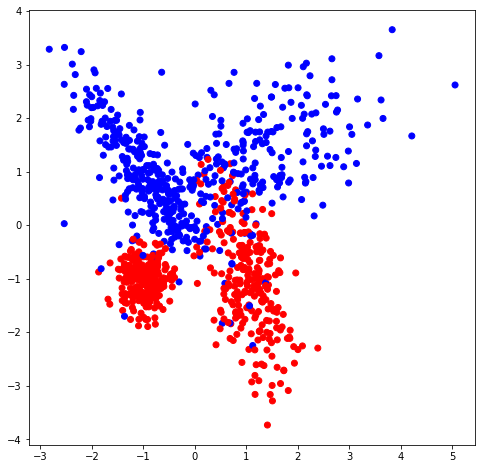

In [ ]:
# визуализируем сгенерированные данные

colors = ListedColormap(['red', 'blue'])
light_colors = ListedColormap(['lightcoral', 'lightblue'])

plt.figure(figsize=(8,8))
plt.scatter(list(map(lambda x: x[0], classification_data)), list(map(lambda x: x[1], classification_data)), 
              c=classification_labels, cmap=colors)
plt.show()

In [ ]:
# classification_data = np.array([[0, 0], [1, 1], [2, 2], [3, 3]])
# classification_labels = np.array([-10, 10, 10, -10])

# n_trees = 6
# my_forest_mini = random_forest(data, labels, n_trees, out_of_bag=True, visual=True)


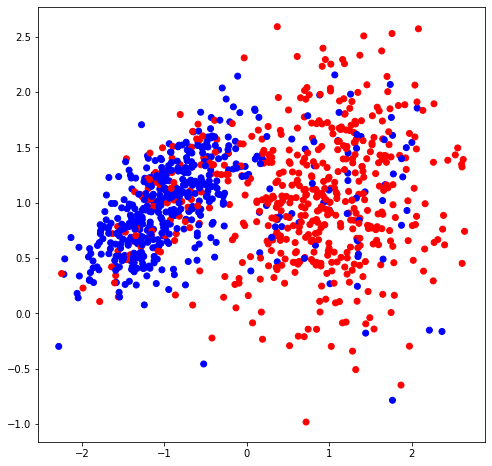

In [ ]:
classification_data, classification_labels = datasets.make_classification(n_samples=1000, 
                                                                          n_features=2, n_informative=2, 
                                                                          n_classes=2, n_redundant=0,                                                                      
                                                                          n_clusters_per_class=1, random_state=3,
                                                                          flip_y=0.3
                                                                          )
colors = ListedColormap(['red', 'blue'])
light_colors = ListedColormap(['lightcoral', 'lightblue'])

plt.figure(figsize=(8,8))
plt.scatter(list(map(lambda x: x[0], classification_data)), list(map(lambda x: x[1], classification_data)), 
              c=classification_labels, cmap=colors)
plt.show()

In [ ]:
# ind_=np.arange(5)
# ind_

array([0, 1, 2, 3, 4])

In [ ]:
np.random.shuffle(np.arange(classification_labels.shape[0]))

frq=np.zeros_like(classification_labels)
pred=np.zeros_like(classification_labels).astype(float)

n_split = 500
RF=[]

for i in range(50):
  # ind_=5
  ind_=np.arange(classification_labels.shape[0])
  np.random.shuffle(ind_)

  ind_test = ind_[:n_split].tolist()
  ind_tr = ind_[n_split:].tolist()
  # print('ind_test', ind_test)

  x_tr, y_tr = classification_data[ind_tr, :], classification_labels[ind_tr]
  x_test, y_test = classification_data[ind_test, :], classification_labels[ind_test]
  tree_i = DecisionTreeClassifier().fit(x_tr, y_tr)
  y_pred = tree_i.predict(x_test)
  RF.append(tree_i)

  # print('y_pred', y_pred)
  # print('y_test',y_test)

  pred[ind_test] += np.abs(y_test.astype(float) == y_pred).astype(float)
  # print('pred', pred)
  frq[ind_test] += 1
  # print('frq ', frq.astype(float))

  count = 0
  pred_x=[]
  for j in range(0, len(frq)):
        if frq[j] != 0:
          # acc += errors_all[j] / frq[j]
          count += 1 
          pred_x.append(pred[j] / frq[j])

error = np.mean(pred / frq)
# error_x = np.mean(pred_x)
error #, error_x

0.7180856992359178